Homework is due September 11th at 6:30 PM sharp. Anything submitted after that will receive a 0. Please submit homework to eagovino@ccny.cuny.edu

# A VERY IMPORTANT NOTE ON HOMEWORK.

Homework is graded on 'effort', meaning that you will get full credit if you attempt a question but get an incorrect answer. That said, there are two caveats: 1) if you can't find the answer for the question, write a note in a Markdown cell explaining what you can't find and 2) your notebook must be able to run - meaning that it will run from top to bottom with none of the cells breaking. Before sending to me, go to Kernel up on the dropdown menu and run Restart and Run All to confirm that the code can run successfully.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Answer Questions 1 through 6 of part 6 of the classwork below (I've reloaded the data for you).

In [2]:
df = pd.read_html('https://en.wikipedia.org/wiki/List_of_countries_by_median_age', header=0)[0]
continents = pd.read_csv('continents.csv')
new_df = df.merge(continents, how='inner', left_on='Country/Territory', right_on='Country(or dependent territory)')
new_df = new_df[['Country/Territory', 'Average(Years)', 'Male(Years)','Female (Years)','Continent']]
new_df['Female_Minus_Male'] = new_df['Female (Years)'] - new_df['Male(Years)'] 

#### 1. Plot the histogram, swarmplot and boxplot of this column. How does this histogram differ from the histogram we saw of the median age above? Are there any outliers?

These histogrm only show few countries on the graph


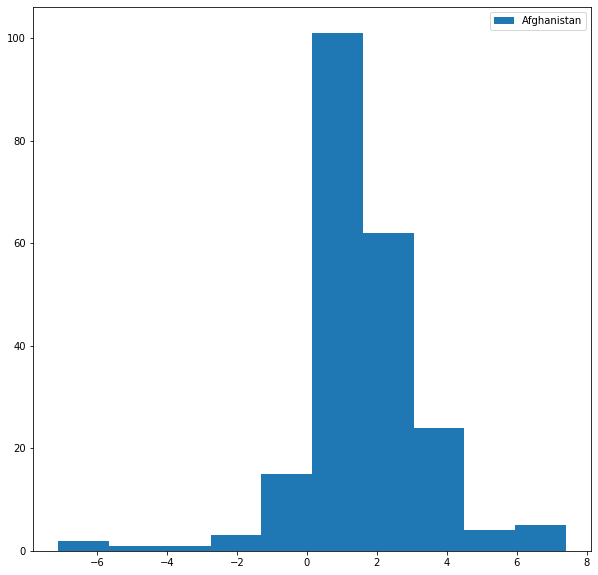

In [3]:
fig = plt.figure(figsize=(10,10))
plt.hist(new_df['Female_Minus_Male'])
plt.gca().legend(new_df['Country/Territory'].unique())
print("These histogrm only show few countries on the graph")

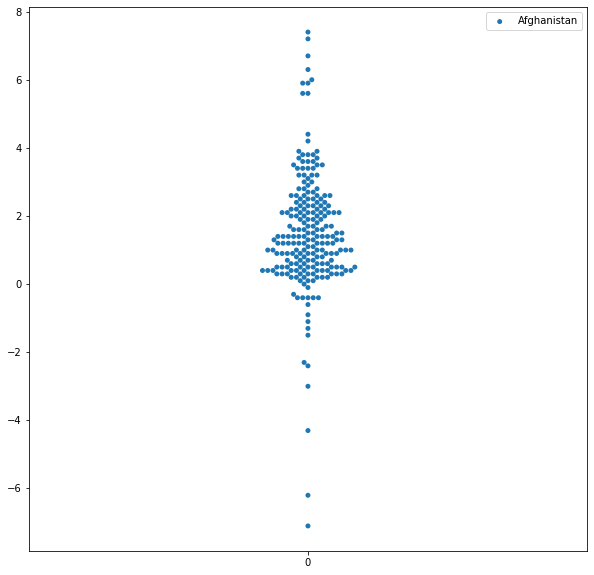

In [4]:
fig = plt.figure(figsize=(10,10))
sns.swarmplot(data=new_df['Female_Minus_Male'])
plt.gca().legend(new_df['Country/Territory'].unique())

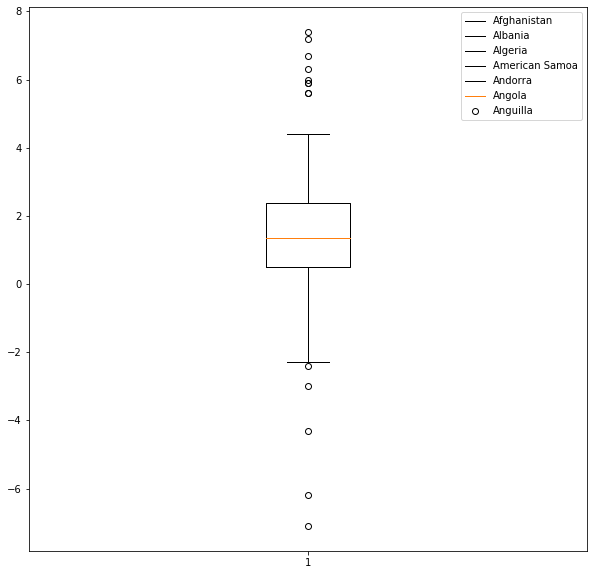

In [5]:
fig = plt.figure(figsize=(10,10))
plt.boxplot(x=new_df['Female_Minus_Male'])
plt.gca().legend(new_df['Country/Territory'].unique())

#### 2. Find the mean, median, variance, standard deviation, maximum, minimum, range, and Interquartile Range of this column.

In [6]:
print('mean:',np.mean(new_df['Female_Minus_Male']))
print('median:',np.median(new_df['Female_Minus_Male']))
print('variance',np.var(new_df['Female_Minus_Male']))
print('sd:',np.std(new_df['Female_Minus_Male']))
max = np.max(new_df['Female_Minus_Male'])
print('max:',max)
min = np.min(new_df['Female_Minus_Male'])
print('min:',min)
print('range:',max- min)
fq = new_df['Female_Minus_Male'].quantile(0.25)
tq = new_df['Female_Minus_Male'].quantile(0.75)
print('interquartile Range:',fq-tq)

mean: 1.5096330275229353
median: 1.3499999999999996
variance 3.2246319754229447
sd: 1.7957260301680056
max: 7.399999999999999
min: -7.100000000000001
range: 14.5
interquartile Range: -1.875


#### 3. Which country has the longest lifespan for females compared to males? Which country has the longest lifespan for males compared to females? Which countries are outliers? What constitutes the cutoff for an outlier in this case?

In [7]:
print(new_df[new_df['Female_Minus_Male'] == np.max(new_df['Female_Minus_Male'])])

print(new_df[new_df['Female_Minus_Male'] == np.min(new_df['Female_Minus_Male'])])
print("Lithuania  has the longest lifespan for females compared to males")
print("United Arab Emirates has the longest lifespan for males compared to females")
print("Lithuania and United Arab Emirates both have a gap between the median age of male and female")

    Country/Territory  Average(Years)  Male(Years)  Female (Years) Continent  \
115         Lithuania            43.7         39.7            47.1    Europe   

     Female_Minus_Male  
115                7.4  
        Country/Territory  Average(Years)  Male(Years)  Female (Years)  \
205  United Arab Emirates            30.3         32.1            25.0   

    Continent  Female_Minus_Male  
205      Asia               -7.1  


#### 4. Find the mean, median, and standard deviation of the data grouped by continent. Which continent has the highest absolute difference between its mean and median? What does the difference between mean and median say about the distribution of values for that continent?

In [8]:
print(new_df.groupby('Continent')['Female_Minus_Male'].mean())
print(new_df.groupby('Continent')['Female_Minus_Male'].median())
print("Asia has the highest absolute difference between its mean and median. Which is ", 1.20-0.814583)
print("Asia is outliers from these continent")

Continent
Africa           0.798000
Asia             0.814583
Europe           3.003704
North America    1.406061
Oceania          1.028571
South America    1.658333
Name: Female_Minus_Male, dtype: float64
Continent
Africa           0.60
Asia             1.20
Europe           2.65
North America    1.10
Oceania          1.00
South America    1.50
Name: Female_Minus_Male, dtype: float64
Asia has the highest absolute difference between its mean and median. Which is  0.385417
Asia is outliers from these continent


#### 5. Plot a swarmplot and boxplot of the data grouped by continent.

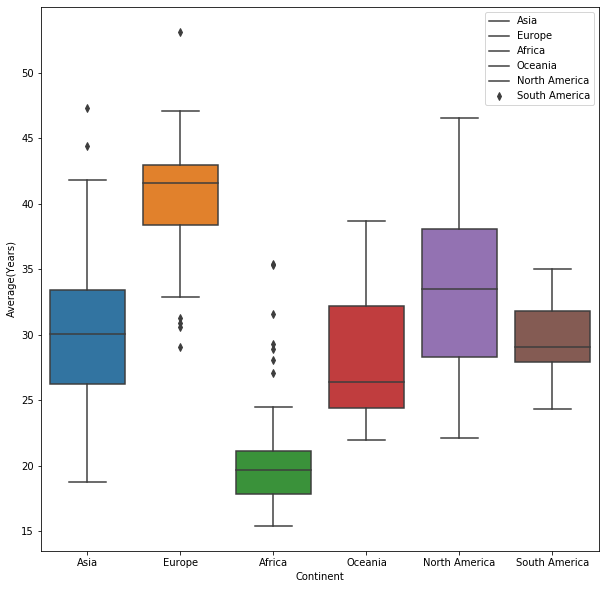

In [9]:
fig = plt.figure(figsize=(10,10))
sns.boxplot(x='Continent', y='Average(Years)', data=new_df)
plt.gca().legend(new_df['Continent'].unique())

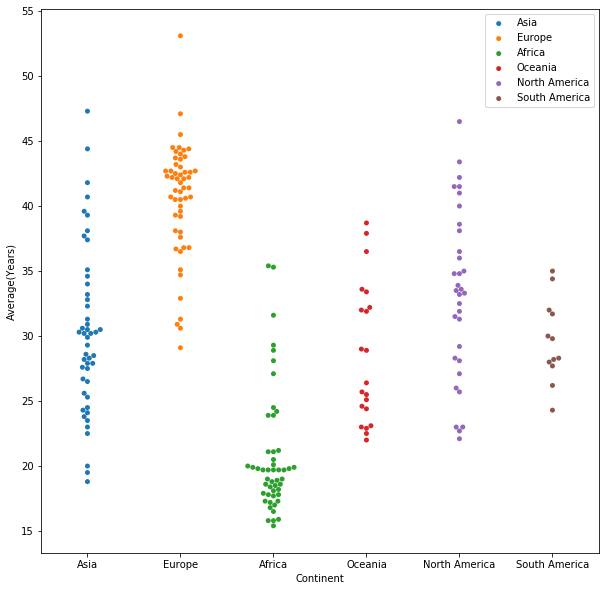

In [10]:
fig = plt.figure(figsize=(10,10))
sns.swarmplot(x='Continent', y='Average(Years)', data=new_df)
plt.gca().legend(new_df['Continent'].unique())

#### 6. Given your observations from the previous two questions, what may be a cause of why the continent with the largest spread is that way? Hint: Look at the outliers for that country.

In [11]:
print("The median age of male in Asia is greater than female.")
print("The median age of female in Europe is greater than male.")

The median age of male in Asia is greater than female.
The median age of female in Europe is greater than male.


### 2. Answer Questions 1 through 10 from [here](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset) below (please copy and paste each question into its own cell with answers below it).

In [12]:
#AdultDataSet
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
df.columns = ['age', 'workingclass', 'fnlwgt', 'education', 'education-num', 'martial-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'salary']
df['salary'] = df['salary'].str.strip()
df['native-country'] = df['native-country'].str.strip()

#### 1. How many men and women (sex feature) are represented in this dataset?

In [13]:
df['sex'].value_counts()


 Male      21789
 Female    10771
Name: sex, dtype: int64

#### 2. What is the average age (age feature) of women?

In [14]:
df[df['sex'].str.contains("Female")]['age'].mean()

36.85823043357163

#### 3. What is the percentage of German citizens (native-country feature)?

In [15]:
print(df['native-country'].value_counts(normalize=True))
print("0.42% is the percentage of German citizens")

United-States                 0.895854
Mexico                        0.019748
?                             0.017905
Philippines                   0.006081
Germany                       0.004208
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003256
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                

#### 4-5. What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature) and those who earn less than 50K per year?

In [16]:

print("Mean for the people who earn equal and less than 50K",df[(df['salary'] == "<=50K") ]['age'].mean())
print("Standard deviation  for the people who earn equaland less than 50K",df[(df['salary'] == "<=50K") ]['age'].std())
print("Mean for the people who earn more than 50K",df[df['salary'] == ">50K"]['age'].mean())
print("Standard deviation  for the people who earn moret han than 50K",df[(df['salary'] == ">50K")]['age'].std())


Mean for the people who earn equal and less than 50K 36.78364820583357
Standard deviation  for the people who earn equaland less than 50K 14.020365001830326
Mean for the people who earn more than 50K 44.24984058155847
Standard deviation  for the people who earn moret han than 50K 10.51902771985177


#### 6. Is it true that people who earn more than 50K have at least high school education? (education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)

In [17]:
print(df[(df['education'] != "Bachelors") &( df['education'] != "Prof-school") & (df['education'] != "Assoc-acdm") & (df['education'] != "Assoc-voc") &( df['education'] != "Doctorate" )&(df['education'].str.contains("th") ) & (df['salary'] == ">50K")])
print("Acorrding to the data, it is false that people who earn more than 50K have at least high school education")

       age       workingclass  fnlwgt education  education-num  \
182     40            Private  286370   7th-8th              4   
213     54       Self-emp-inc  125417   7th-8th              4   
414     35            Private   92440      12th              8   
587     52            Private   25826      10th              6   
591     60            Private   39352   7th-8th              4   
659     44   Self-emp-not-inc  335183      12th              8   
728     65   Self-emp-not-inc  118474      11th              7   
933     37            Private  186934      11th              7   
1390    40          Local-gov  289403   7th-8th              4   
1394    42            Private  230624      10th              6   
1494    28       Self-emp-inc  210295      11th              7   
1495    32            Private   80058      11th              7   
1530    40            Private   85995      10th              6   
1532    49            Private  245305      10th              6   
1977    48

#### 7. Display age statistics for each race (race feature) and each gender (sex feature). Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.

In [18]:
print(df.groupby('race')['sex'].describe())
print("The maximum age of men of Amer-Indian-Eskimo race is",df[df['race'].str.contains("Amer-Indian-Eskimo")]['age'].max())

                     count unique    top   freq
race                                           
 Amer-Indian-Eskimo    311      2   Male    192
 Asian-Pac-Islander   1039      2   Male    693
 Black                3124      2   Male   1569
 Other                 271      2   Male    162
 White               27815      2   Male  19173
The maximum age of men of Amer-Indian-Eskimo race is 82


#### 8. Among whom is the proportion of those who earn a lot (>50K) greater: married or single men (marital-status feature)? Consider as married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.

In [19]:
df[(df['salary'] == ">50K") ]['martial-status'].value_counts(normalize =True)
print("The proportion of singke men is",0.06262+ 0.059049+ 0.010840 +0.008417)
print("The proportion of singke men is",0.853463+0.004336+0.001275)


The proportion of singke men is 0.140926
The proportion of singke men is 0.859074


#### 9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?

In [20]:
print(df['hours-per-week'].max())
a = df[((df['hours-per-week'].max())) == df['hours-per-week'] ]['hours-per-week'].value_counts()
b = df[((df['hours-per-week'].max()) == df['hours-per-week']) & (df['salary'] == '>50K')]['hours-per-week'].value_counts() 
print("The maximum number of hours a person works per week is",a.sum())
print("There are",b.sum(),"people work such a number of hours")
print("The percentage of those who earn a lot (>50K) among them is",b.sum()/a.sum() * 100, "%")


99
The maximum number of hours a person works per week is 85
There are 25 people work such a number of hours
The percentage of those who earn a lot (>50K) among them is 29.411764705882355 %


#### 10. Count the average time of work (hours-per-week) for those who earn a little and a lot (salary) for each country (native-country). What will these be for Japan?

In [21]:
a = df.groupby((['native-country'  ,'salary']))['hours-per-week'].mean()
result =0
print(a)
for i,row in df.iterrows():
    if row['native-country'] == "Japan":
            result= result+row['hours-per-week']
print("The average time of work for Japan is",result)


native-country              salary
?                           <=50K     40.164760
                            >50K      45.547945
Cambodia                    <=50K     41.416667
                            >50K      40.000000
Canada                      <=50K     37.914634
                            >50K      45.641026
China                       <=50K     37.381818
                            >50K      38.900000
Columbia                    <=50K     38.684211
                            >50K      50.000000
Cuba                        <=50K     37.985714
                            >50K      42.440000
Dominican-Republic          <=50K     42.338235
                            >50K      47.000000
Ecuador                     <=50K     38.041667
                            >50K      48.750000
El-Salvador                 <=50K     36.030928
                            >50K      45.000000
England                     <=50K     40.483333
                            >50K      44.533333
Franc